# Sales Prediction

In [57]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [58]:
sales_data = pd.read_csv("./Store_Item_Demand_Data/train.csv")

In [59]:
sales_data.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [60]:
(sales_data.isnull() == True).sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [61]:
sales_data = sales_data.drop(['store','item'],axis=1)

In [62]:
sales_data

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
...,...,...
912995,2017-12-27,63
912996,2017-12-28,59
912997,2017-12-29,74
912998,2017-12-30,62


In [63]:
sales_data['date'] = pd.to_datetime(sales_data['date'])

In [64]:
sales_data

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
...,...,...
912995,2017-12-27,63
912996,2017-12-28,59
912997,2017-12-29,74
912998,2017-12-30,62


In [65]:
sales_data_daily = sales_data
sales_data_daily["date"] = sales_data_daily["date"].dt.to_period("D")
sales_data_daily = sales_data_daily.groupby("date").sum().reset_index()

In [66]:
sales_data["date"] = sales_data["date"].dt.to_timestamp()
sales_data_monthly = sales_data
sales_data_monthly["date"] = sales_data_monthly["date"].dt.to_period("M")
sales_data_monthly = sales_data_monthly.groupby("date").sum().reset_index()

Text(0.5, 0, 'Date')

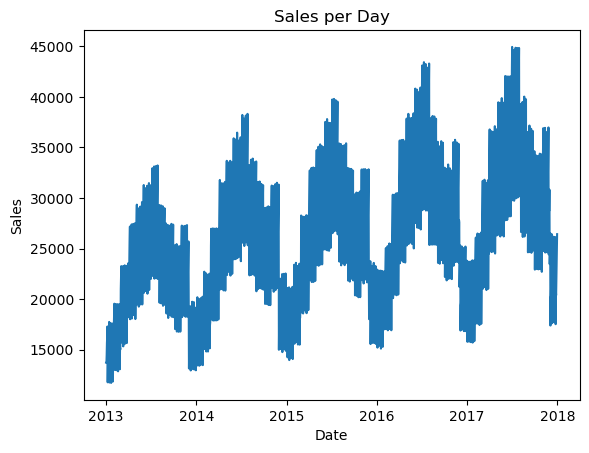

In [67]:
plt.plot(sales_data_daily["date"].dt.to_timestamp(), sales_data_daily["sales"])
plt.title("Sales per Day")
plt.ylabel("Sales")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

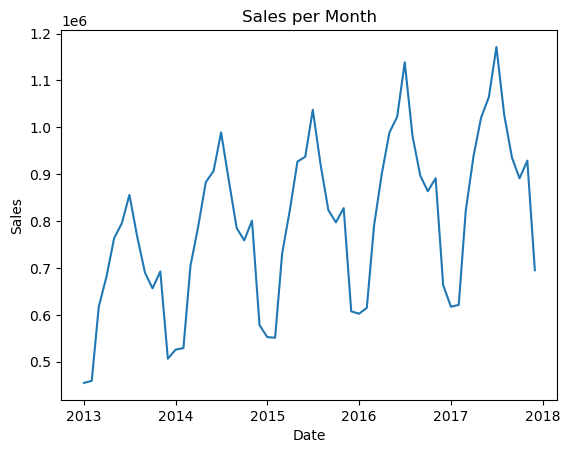

In [68]:
plt.plot(sales_data_monthly["date"].dt.to_timestamp(), sales_data_monthly["sales"])
plt.title("Sales per Month")
plt.ylabel("Sales")
plt.xlabel("Date")

In [69]:
sales_data_clean = sales_data_monthly.drop("date", axis=1)

In [70]:
for i in range(1, 13):
    month = "month_" + str(i)
    sales_data_clean[month] = sales_data_clean["sales"].shift(i)
    

In [71]:
sales_data_clean = sales_data_clean.dropna().reset_index(drop=True)

In [72]:
sales_data_clean.head()

,sales,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,525987,506607.0,692643.0,656587.0,689907.0,766761.0,855922.0,795597.0,763242.0,682274.0,617382.0,459417.0,454904.0
1,529117,525987.0,506607.0,692643.0,656587.0,689907.0,766761.0,855922.0,795597.0,763242.0,682274.0,617382.0,459417.0
2,704301,529117.0,525987.0,506607.0,692643.0,656587.0,689907.0,766761.0,855922.0,795597.0,763242.0,682274.0,617382.0
3,788914,704301.0,529117.0,525987.0,506607.0,692643.0,656587.0,689907.0,766761.0,855922.0,795597.0,763242.0,682274.0
4,882877,788914.0,704301.0,529117.0,525987.0,506607.0,692643.0,656587.0,689907.0,766761.0,855922.0,795597.0,763242.0


In [73]:
training_data, testing_data = (
    sales_data_clean[: int(0.8 * sales_data_clean.shape[0])],
    sales_data_clean[int(0.8 * sales_data_clean.shape[0]) :],
)

In [74]:
y_training_data, X_training_data = training_data.iloc[:,0],training_data.iloc[:,1:]
y_testing_data, X_testing_data = testing_data.iloc[:,0],testing_data.iloc[:,1:]

In [75]:
scalar = MinMaxScaler()

In [76]:
X_training_data_scaled = scalar.fit_transform(X_training_data)

In [77]:
X_testing_data_scaled = scalar.transform(X_testing_data)

In [78]:
linear_regression = LinearRegression()
xgboost_regression = XGBRegressor()
svm_regression = SVR()

In [79]:
linear_regression.fit(X_training_data_scaled,y_training_data)

LinearRegression()

In [80]:
xgboost_regression.fit(X_training_data_scaled,y_training_data)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [81]:
svm_regression.fit(X_training_data_scaled, y_training_data)

SVR()

In [101]:
sales_dates = sales_data_monthly["date"][-10:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [83]:
linear_regression_y_testing_prediction = linear_regression.predict(X_testing_data_scaled)

In [84]:
linear_regression_sales_prediction = linear_regression.predict(X_testing_data_scaled)

In [85]:
xgboost_regression_sales_prediction = xgboost_regression.predict(X_testing_data_scaled)

In [86]:
svm_regression_sales_prediction = svm_regression.predict(X_testing_data_scaled)

In [103]:
linear_regression_predict_df = predict_df.merge(
    pd.Series(linear_regression_sales_prediction, name="sales_prediction"),
    left_index=True,
    right_index=True
)

In [104]:
xgboost_regression_predict_df = predict_df.merge(
    pd.Series(xgboost_regression_sales_prediction, name="sales_prediction"),
    left_index=True, 
    right_index=True
)

In [106]:
svm_regression_predict_df = predict_df.merge(
    pd.Series(svm_regression_sales_prediction, name="sales_prediction"),
    left_index=True, 
    right_index=True
)

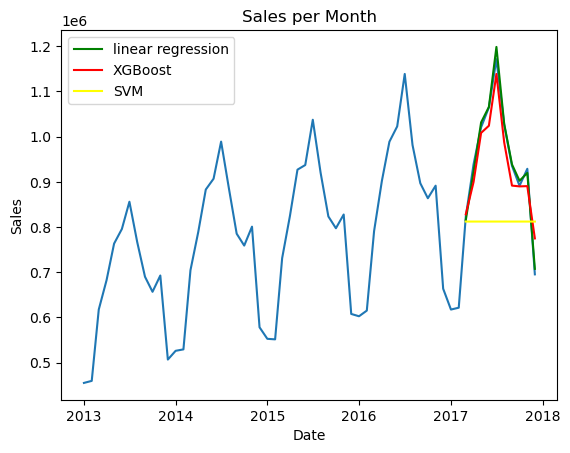

In [107]:
plt.plot(sales_data_monthly["date"].dt.to_timestamp(), sales_data_monthly["sales"])
plt.plot(
    linear_regression_predict_df["date"].dt.to_timestamp(),
    linear_regression_predict_df["sales_prediction"],
    color="green",
    label="linear regression",
)
plt.plot(
    xgboost_regression_predict_df["date"].dt.to_timestamp(),
    xgboost_regression_predict_df["sales_prediction"],
    color="red",
    label="XGBoost",
)
plt.plot(
    svm_regression_predict_df["date"].dt.to_timestamp(),
    svm_regression_predict_df["sales_prediction"],
    color="yellow",
    label="SVM",
)
plt.title("Sales per Month")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.legend()


In [109]:
import torch
import torch.nn as nn


class CNN_1D(nn.Module):
    def __init__(self):
        super(CNN_1D, self).__init__()
        self.conv_1 = nn.Conv1d(
            1, 10, 3
        )  # Conv1d with 1 input channel, 10 output channels, and kernel size 3
        self.rl = nn.ReLU()
        self.fc = nn.Linear(
            100, 1
        )  # Adjust the input size based on the output from conv layer

    def forward(self, x):
        out = self.conv_1(x)
        out = self.rl(out)
        out = out.view(out.size(0), -1)  # Flatten the output from conv layer
        out = self.fc(out)
        return out

In [110]:
X_training_data_tensor = torch.tensor(X_training_data.values).unsqueeze(1).float()
X_testing_data_tensor = torch.tensor(X_testing_data.values).unsqueeze(1).float()
y_training_data_tensor = torch.tensor(y_training_data.values).float()

In [111]:
cnn_1d = CNN_1D()

In [112]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(cnn_1d.parameters(),lr=0.001)

In [95]:
for _ in range(10):
    output = cnn_1d(X_training_data_tensor).squeeze()
    loss = criterion(y_training_data_tensor, output)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss)

tensor(5.6685e+11, grad_fn=<MseLossBackward0>)
tensor(5.4953e+11, grad_fn=<MseLossBackward0>)
tensor(5.3258e+11, grad_fn=<MseLossBackward0>)
tensor(5.1600e+11, grad_fn=<MseLossBackward0>)
tensor(4.9978e+11, grad_fn=<MseLossBackward0>)
tensor(4.8392e+11, grad_fn=<MseLossBackward0>)
tensor(4.6841e+11, grad_fn=<MseLossBackward0>)
tensor(4.5324e+11, grad_fn=<MseLossBackward0>)
tensor(4.3840e+11, grad_fn=<MseLossBackward0>)
tensor(4.2386e+11, grad_fn=<MseLossBackward0>)


In [113]:
y_prediction_cnn_1d = cnn_1d(X_testing_data_tensor)

In [114]:
y_prediction_cnn_1d

tensor([[ 49174.7969],
        [ 20039.8828],
        [-18472.7812],
        [-36075.0000],
        [  2863.4792],
        [ 33900.4219],
        [ 71618.3828],
        [105846.7422],
        [147726.4062],
        [128800.9219]], grad_fn=<AddmmBackward0>)

In [115]:
cnn_1d_predict_df = predict_df.merge(
    pd.Series(y_prediction_cnn_1d.squeeze().detach().numpy(), name="sales_prediction"),
    left_index=True,
    right_index=True,
)


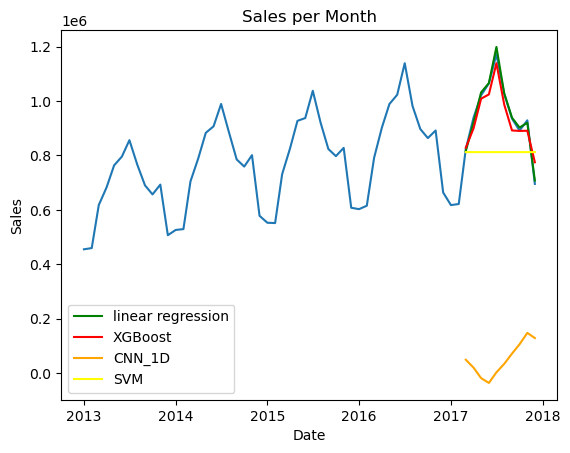

In [116]:
plt.plot(sales_data_monthly["date"].dt.to_timestamp(), sales_data_monthly["sales"])
plt.plot(
    linear_regression_predict_df["date"].dt.to_timestamp(),
    linear_regression_predict_df["sales_prediction"],
    color="green",
    label="linear regression",
)
plt.plot(
    xgboost_regression_predict_df["date"].dt.to_timestamp(),
    xgboost_regression_predict_df["sales_prediction"],
    color="red",
    label="XGBoost",
)
plt.plot(
    cnn_1d_predict_df["date"].dt.to_timestamp(),
    cnn_1d_predict_df["sales_prediction"],
    color="orange",
    label="CNN_1D",
)
plt.plot(
    svm_regression_predict_df["date"].dt.to_timestamp(),
    svm_regression_predict_df["sales_prediction"],
    color="yellow",
    label="SVM",
)
plt.title("Sales per Month")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.legend()


In [119]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(
    sales_data_monthly["sales"][:50], order=(1, 2, 1)
)  # Start with (1, 1, 1) and adjust as needed
model_fit = model.fit()

# Forecast the next 10 data points
arima_predictions = model_fit.forecast(steps=10)

# Convert predictions to a Pandas Series for comparison
arima_predictions_series = pd.Series(arima_predictions, name="sales_prediction")
arima_predictions_series.index = [i for i in range(10)]

In [120]:
arima_predict_df = predict_df.merge(arima_predictions_series,left_index=True, right_index=True)

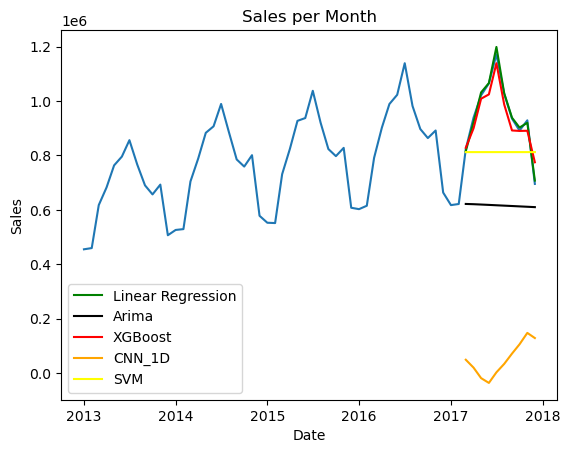

In [121]:
plt.plot(sales_data_monthly["date"].dt.to_timestamp(), sales_data_monthly["sales"])
plt.plot(
    linear_regression_predict_df["date"].dt.to_timestamp(),
    linear_regression_predict_df["sales_prediction"],
    color="green",
    label="Linear Regression",
)
plt.plot(
    arima_predict_df["date"].dt.to_timestamp(),
    arima_predict_df["sales_prediction"],
    color="black",
    label="Arima",
)
plt.plot(
    xgboost_regression_predict_df["date"].dt.to_timestamp(),
    xgboost_regression_predict_df["sales_prediction"],
    color="red",
    label="XGBoost",
)
plt.plot(
    cnn_1d_predict_df["date"].dt.to_timestamp(),
    cnn_1d_predict_df["sales_prediction"],
    color="orange",
    label="CNN_1D",
)
plt.plot(
    svm_regression_predict_df["date"].dt.to_timestamp(),
    svm_regression_predict_df["sales_prediction"],
    color="yellow",
    label="SVM",
)
plt.title("Sales per Month")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.legend()
